In [1]:
!! pip install scikit-learn


['Requirement already satisfied: scikit-learn in c:\\users\\dell\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (1.3.2)',
 'Requirement already satisfied: numpy<2.0,>=1.17.3 in c:\\users\\dell\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from scikit-learn) (1.26.2)',
 'Requirement already satisfied: scipy>=1.5.0 in c:\\users\\dell\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from scikit-learn) (1.11.4)',
 'Requirement already satisfied: joblib>=1.1.1 in c:\\users\\dell\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from scikit-learn) (1.3.2)',
 'Requirement already satisfied: threadpoolctl>=2.0.0 in c:\\users\\dell\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from scikit-learn) (3.2.0)']

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
diabetes_dataset = load_diabetes()
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [3]:
print(diabetes_dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
diabetes = pd.DataFrame(diabetes_dataset.data)
diabetes.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
ind1, ind2 = 2,5
diabetes['s6'] = diabetes_dataset.target
correlation_matrix = diabetes.corr().round(2)

In [6]:
X = diabetes_dataset.data[:, [ind1, ind2] ]
y = diabetes_dataset.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 2)
(89, 2)
(353,)
(89,)


In [8]:
model = Ridge()
model.fit(X_train, y_train)

Ridge()

In [9]:
fx_test = model.predict(X_test)
mse = mean_squared_error(y_test, fx_test)
print('RMSE is {}'.format(mse))

RMSE is 5011.902114934742


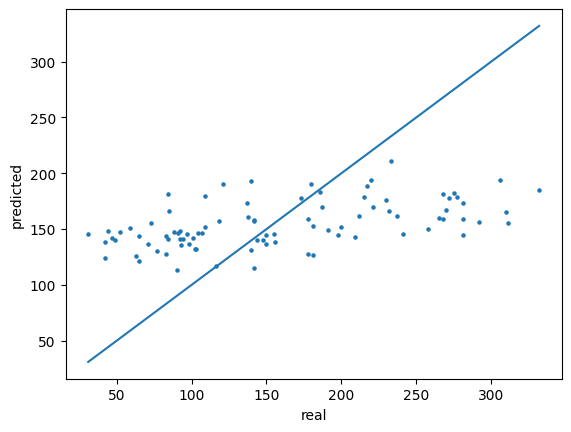

In [10]:
(minv, maxv) = (y_test.min(),y_test.max())
fig,ax=plt.subplots()
ax.scatter(y_test,fx_test,marker="o",s=5) # points of size 5
ax.plot([minv, maxv],[minv, maxv]) #y=f(x) ideal line
ax.set_xlabel("real")
ax.set_ylabel("predicted")
plt.show()

In [11]:
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=2, scoring='neg_root_mean_squared_error')

print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Mean score of -62.97 with a standard deviation of 0.29


In [12]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg_scores = cross_val_score(linear_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
linear_reg_mse = -np.mean(linear_reg_scores)

# Ridge Regression
ridge_reg = Ridge()
ridge_scores = cross_val_score(ridge_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
ridge_mse = -np.mean(ridge_scores)

# Lasso Regression
lasso_reg = Lasso()
lasso_scores = cross_val_score(lasso_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lasso_mse = -np.mean(lasso_scores)

# Elastic Net Regression
elastic_net = ElasticNet()
elastic_net_scores = cross_val_score(elastic_net, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
elastic_net_mse = -np.mean(elastic_net_scores)

# Print the MSE for each method
print("Linear Regression MSE:", linear_reg_mse)
print("Ridge Regression MSE:", ridge_mse)
print("Lasso Regression MSE:", lasso_mse)
print("Elastic Net Regression MSE:", elastic_net_mse)

Linear Regression MSE: 3828.4145474491147
Ridge Regression MSE: 4552.583709680698
Lasso Regression MSE: 4292.892683718489
Elastic Net Regression MSE: 5862.6372005568455


In [8]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [9]:
# Loading the dataset
df = pd.read_csv('kaggle_diabetes.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'kaggle_diabetes.csv'